In [4]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [5]:
us = pd.read_csv('ofac_sdn.csv',low_memory=False)
us = us.sort_values(by=['month'])
us['listing_month'] = us['new_listing_count'].groupby(us['month']).transform('sum')

bis = pd.read_csv('us_bis.csv',low_memory=False)
bis = bis.sort_values(by=['month'])
bis['listing_month'] = bis['new_listing_count'].groupby(bis['month']).transform('sum')

cons = pd.read_csv('ofac_cons.csv',low_memory=False)
cons = cons.sort_values(by=['month'])
cons['listing_month'] = cons['new_listing_count'].groupby(cons['month']).transform('sum')

fsf= pd.read_csv('eu_fsf.csv',low_memory=False)
fsf = fsf.sort_values(by=['month'])
fsf['listing_month'] = fsf['new_listing_count'].groupby(fsf['month']).transform('sum')

eu_map = pd.read_csv('eu_map.csv',low_memory=False)
eu_map = eu_map.sort_values(by=['month'])
eu_map['listing_month'] = eu_map['new_listing_count'].groupby(eu_map['month']).transform('sum')

combined = pd.read_csv('df_all.csv',low_memory=False)
combined = combined.sort_values(by=['month'])
combined['listing_month'] = combined['new_listing_count'].groupby(combined['month']).transform('sum')

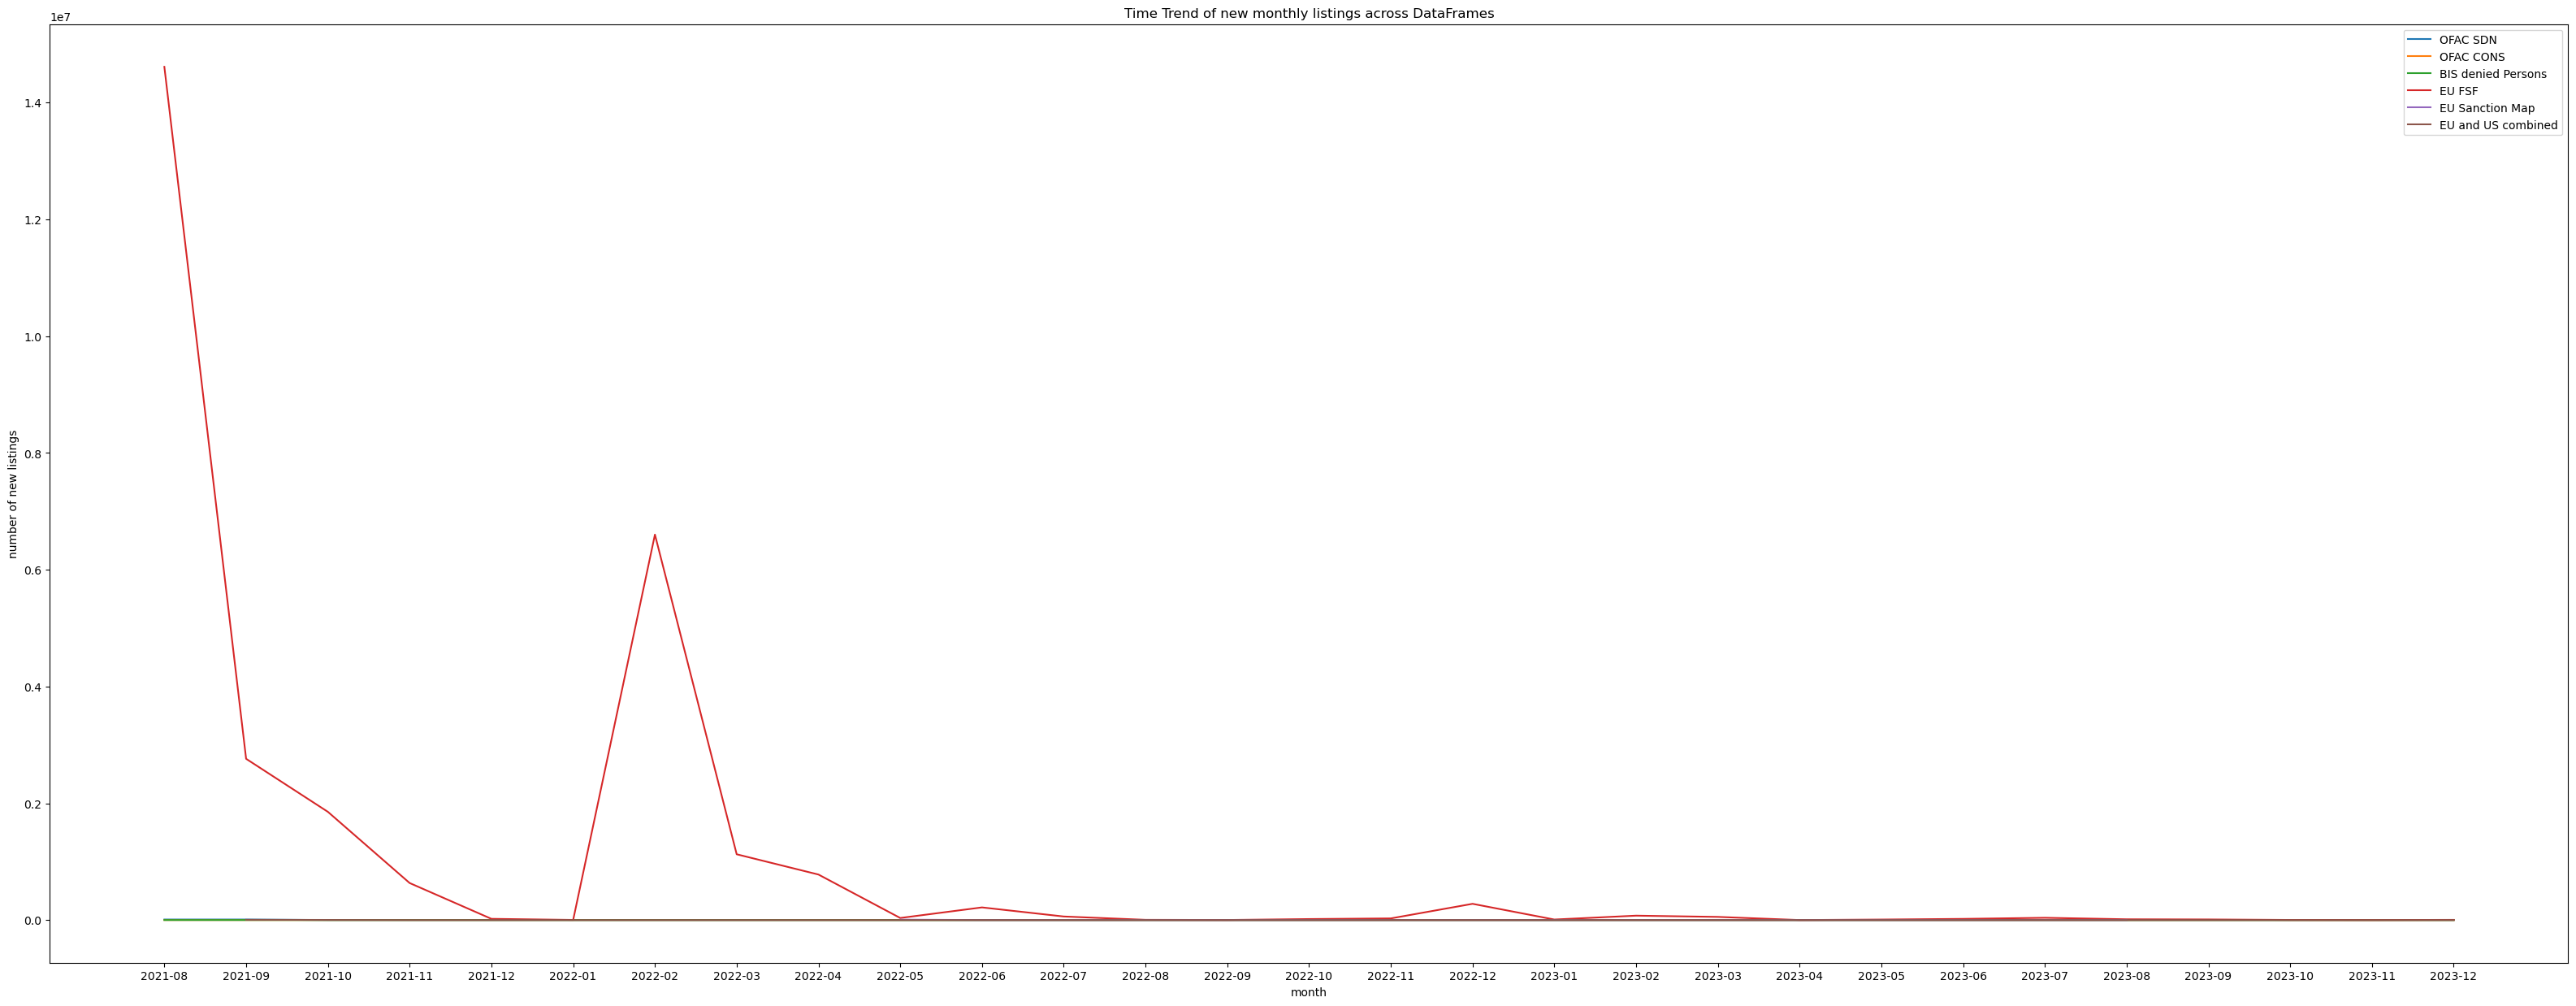

<Figure size 640x480 with 0 Axes>

In [24]:
# Assuming dfs is a list of your DataFrames containing the time trend data for one property
# Assuming property_name is the name of the property you want to compare

plt.figure(figsize=(40, 15))  # Adjust figure size as needed

# Define a color cycle for the plot
colors = plt.cm.tab10.colors  # You can choose any colormap you prefer
legend_labels = ['OFAC SDN','OFAC CONS','BIS denied Persons','EU FSF','EU Sanction Map','EU and US combined']  # List to store legend labels
dfs = [us,cons,bis,fsf,eu_map,combined]
# Plotting each DataFrame separately
for i, df in enumerate(dfs):
    # Assuming the index represents time
    x = df['month']
    # Assuming the column containing the property values is named property_name
    y = df['listing_month']
    
    # Plot the data with a different color for each DataFrame
    plt.plot(x, y, label=f'DataFrame {i+1}', color=colors[i % len(colors)])
 # Append legend label for this line
    legend_labels.append(f'DataFrame {i+1}')

# Add labels and legend
plt.xlabel('month')
plt.ylabel('number of new listings')
plt.title(f'Time Trend of new monthly listings across DataFrames')
plt.legend(legend_labels)

# Show plot
plt.show()
plt.savefig('timetrend_all.png')